In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import r2_score



C:\Users\asus\AppData\Local\Temp\ipykernel_15304\1896921527.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data=pd.read_csv('Placements_Dataset.csv')

In [3]:
data.head()

,Name of Student,Roll No.,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering,Placement Package
0,Todd Pope,30678,151,8.52,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,2,24.2,24,Computer Science,20.01
1,Sandra Brown,49191,24,1.23,Yes,No,No,Yes,No,No,Yes,No,No,Yes,1,20.5,18,Computer Science,10.97
2,Mrs. Amanda Singleton,83519,333,9.85,No,Yes,Yes,No,Yes,No,No,No,No,No,1,21.6,25,Mechanical Engineering,7.51
3,Matthew Alvarado,56203,132,1.96,No,No,Yes,No,Yes,No,No,No,Yes,No,4,21.2,20,Computer Science,4.96
4,Christine Smith,82173,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,1,20.7,21,Electrical Engineering,46.30


In [4]:
data.shape

(220000, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220000 entries, 0 to 219999
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name of Student               220000 non-null  object 
 1   Roll No.                      220000 non-null  int64  
 2   No. of DSA questions          220000 non-null  int64  
 3   CGPA                          220000 non-null  float64
 4   Knows ML                      215581 non-null  object 
 5   Knows DSA                     220000 non-null  object 
 6   Knows Python                  215573 non-null  object 
 7   Knows JavaScript              215718 non-null  object 
 8   Knows HTML                    215671 non-null  object 
 9   Knows CSS                     215678 non-null  object 
 10  Knows Cricket                 220000 non-null  object 
 11  Knows Dance                   220000 non-null  object 
 12  Participated in College Fest  220000 non-nul

In [6]:
data.describe()

,Roll No.,No. of DSA questions,CGPA,No. of backlogs,Interview Room Temperature,Age of Candidate,Placement Package
count,220000.000000,220000.000000,220000.000000,220000.000000,220000.000000,220000.000000,220000.000000
mean,54857.740568,250.099414,5.005776,2.497368,24.004006,21.497373,20.295666
std,25983.468755,144.545550,2.888164,1.707581,3.467504,2.290835,15.597126
min,10000.000000,0.000000,0.000000,0.000000,18.000000,18.000000,2.500000
25%,32394.000000,125.000000,2.500000,1.000000,21.000000,19.000000,6.950000
50%,54695.000000,250.000000,5.020000,2.000000,24.000000,21.000000,12.530000
75%,77376.000000,375.000000,7.500000,4.000000,27.000000,23.000000,32.830000
max,99999.000000,500.000000,10.000000,5.000000,30.000000,25.000000,58.000000


In [7]:
data.dropna()

,Name of Student,Roll No.,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering,Placement Package
0,Todd Pope,30678,151,8.52,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,2,24.2,24,Computer Science,20.01
1,Sandra Brown,49191,24,1.23,Yes,No,No,Yes,No,No,Yes,No,No,Yes,1,20.5,18,Computer Science,10.97
2,Mrs. Amanda Singleton,83519,333,9.85,No,Yes,Yes,No,Yes,No,No,No,No,No,1,21.6,25,Mechanical Engineering,7.51
3,Matthew Alvarado,56203,132,1.96,No,No,Yes,No,Yes,No,No,No,Yes,No,4,21.2,20,Computer Science,4.96
4,Christine Smith,82173,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,1,20.7,21,Electrical Engineering,46.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,Ashley Conner,36698,453,8.77,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,5,28.4,24,Electrical Engineering,24.81
219996,Samuel Kemp,85027,375,6.15,No,No,Yes,Yes,No,No,No,Yes,No,No,3,27.6,18,Electrical Engineering,11.00
219997,Alexander Payne,92497,52,2.05,No,No,No,No,Yes,No,No,No,Yes,Yes,4,27.2,25,Computer Science,3.82
219998,Sean Bauer,35235,404,5.63,No,No,Yes,Yes,No,Yes,No,No,No,Yes,0,25.0,21,Mechanical Engineering,47.80


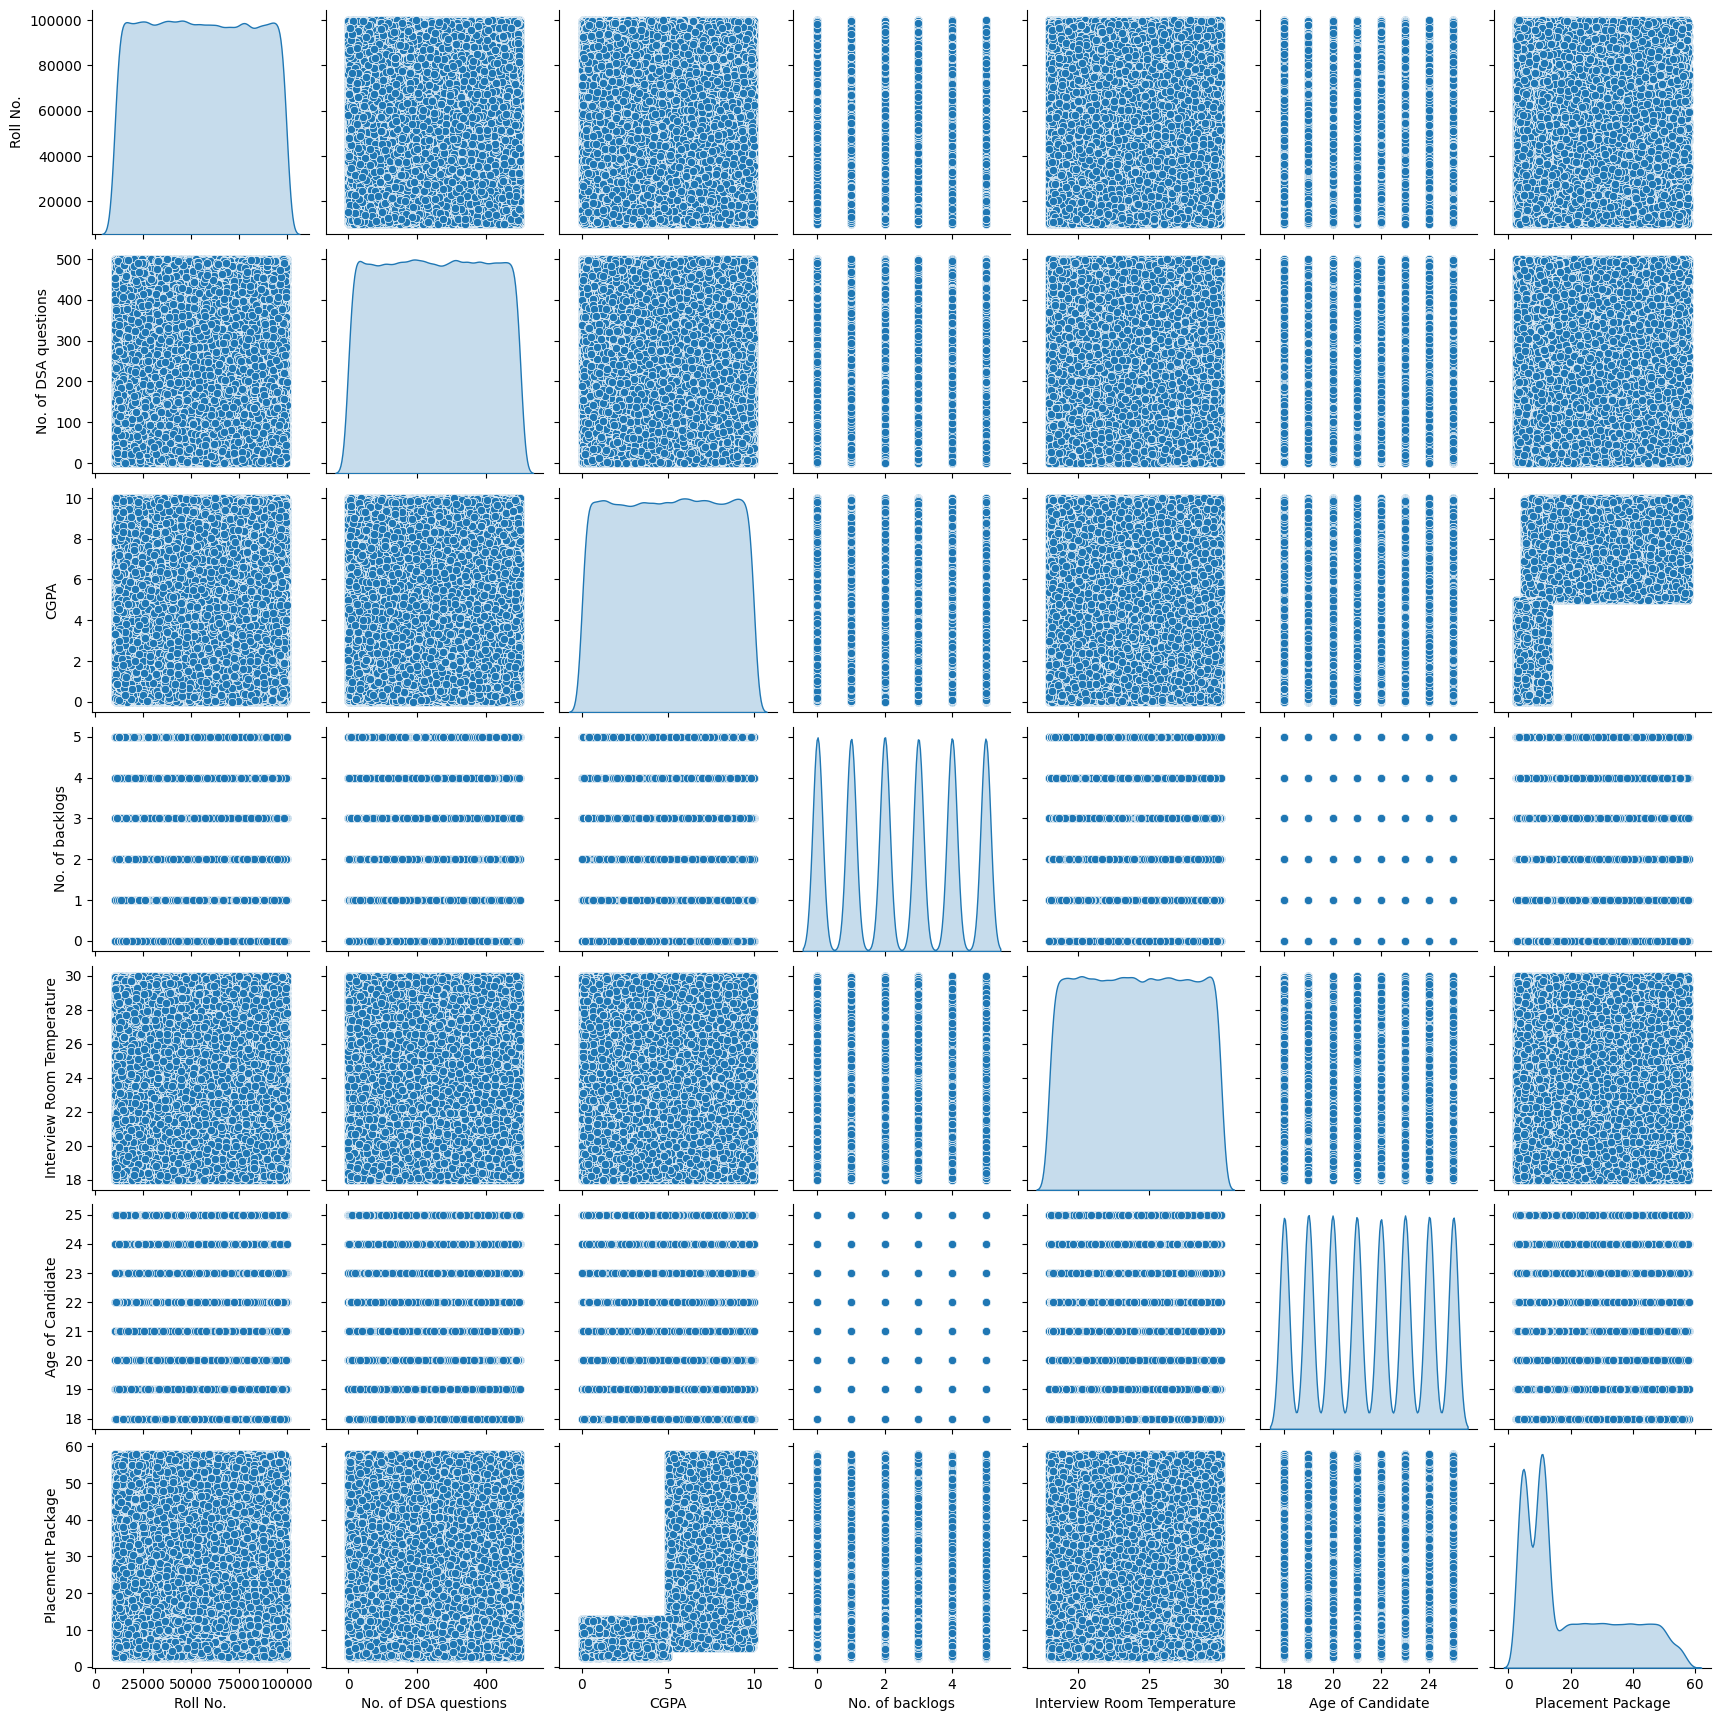

In [8]:
sns.pairplot(data,diag_kind="kde")

In [9]:
data.isnull().sum()

Name of Student                    0
Roll No.                           0
No. of DSA questions               0
CGPA                               0
Knows ML                        4419
Knows DSA                          0
Knows Python                    4427
Knows JavaScript                4282
Knows HTML                      4329
Knows CSS                       4322
Knows Cricket                      0
Knows Dance                        0
Participated in College Fest       0
Was in Coding Club                 0
No. of backlogs                    0
Interview Room Temperature         0
Age of Candidate                   0
Branch of Engineering              0
Placement Package                  0
dtype: int64

In [10]:
data=data.drop(['Name of Student','Roll No.'],axis=1)
data.head()

,No. of DSA questions,CGPA,Knows ML,Knows DSA,Knows Python,Knows JavaScript,Knows HTML,Knows CSS,Knows Cricket,Knows Dance,Participated in College Fest,Was in Coding Club,No. of backlogs,Interview Room Temperature,Age of Candidate,Branch of Engineering,Placement Package
0,151,8.52,Yes,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,2,24.2,24,Computer Science,20.01
1,24,1.23,Yes,No,No,Yes,No,No,Yes,No,No,Yes,1,20.5,18,Computer Science,10.97
2,333,9.85,No,Yes,Yes,No,Yes,No,No,No,No,No,1,21.6,25,Mechanical Engineering,7.51
3,132,1.96,No,No,Yes,No,Yes,No,No,No,Yes,No,4,21.2,20,Computer Science,4.96
4,198,9.73,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,1,20.7,21,Electrical Engineering,46.30


In [11]:
data.nunique()

No. of DSA questions             501
CGPA                            1001
Knows ML                           2
Knows DSA                          2
Knows Python                       2
Knows JavaScript                   2
Knows HTML                         2
Knows CSS                          2
Knows Cricket                      2
Knows Dance                        2
Participated in College Fest       2
Was in Coding Club                 2
No. of backlogs                    6
Interview Room Temperature       121
Age of Candidate                   8
Branch of Engineering              4
Placement Package               5550
dtype: int64

one hot encoding using pandas


In [12]:
   data=pd.get_dummies(data,columns=['Branch of Engineering'])

In [13]:
for i in ['Knows ML', 'Knows DSA', 'Knows Python', 'Knows JavaScript',
       'Knows HTML', 'Knows CSS', 'Knows Cricket', 'Knows Dance',
       'Participated in College Fest', 'Was in Coding Club']:
    data[i]=data[i].replace({'Yes':1,'No':0})
   # data[i]=data[i].replace({'False':0,'True':1})

C:\Users\asus\AppData\Local\Temp\ipykernel_15304\4214357136.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[i]=data[i].replace({'Yes':1,'No':0})


In [15]:
X=data[["No. of DSA questions","CGPA","Knows ML","Knows DSA","Knows Python","Knows JavaScript","Knows HTML","Knows CSS","Was in Coding Club","No. of backlogs","Interview Room Temperature","Age of Candidate"]]
y=data["Placement Package"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)
X_train.shape,X_test.shape

((154000, 12), (66000, 12))

In [16]:
 X=data[["No. of DSA questions","CGPA","Knows ML","Knows DSA","Knows Python","Knows JavaScript","Knows HTML","Knows CSS","Was in Coding Club","No. of backlogs","Interview Room Temperature","Age of Candidate","Branch of Engineering_Civil Engineering","Branch of Engineering_Computer Science","Branch of Engineering_Electrical Engineering","Branch of Engineering_Mechanical Engineering"]]
 y=data["Placement Package"]
 X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)
 X_train.shape,X_test.shape

((154000, 16), (66000, 16))

In [18]:
clf=RandomForestRegressor()
clf.fit(X_train,y_train)

RandomForestRegressor()

In [19]:
y_pred=poly.predict(X_test)

In [20]:
print(r2_score(y_pred,y_test))

0.5388851794361551
